<a href="https://colab.research.google.com/github/RajratanWankhade/Analytics_Business_Data/blob/main/Analytics_Business_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1

## Task1

In [2]:
##
## Slide code
##
from IPython.display import Image
def slide(what):
    display( Image( "/content/drive/MyDrive/Business_Analytics/Slides/BA_Page_" + what + ".png", width = 50, height = 50, retina = True  ) )

### Introduction to Business Analytics

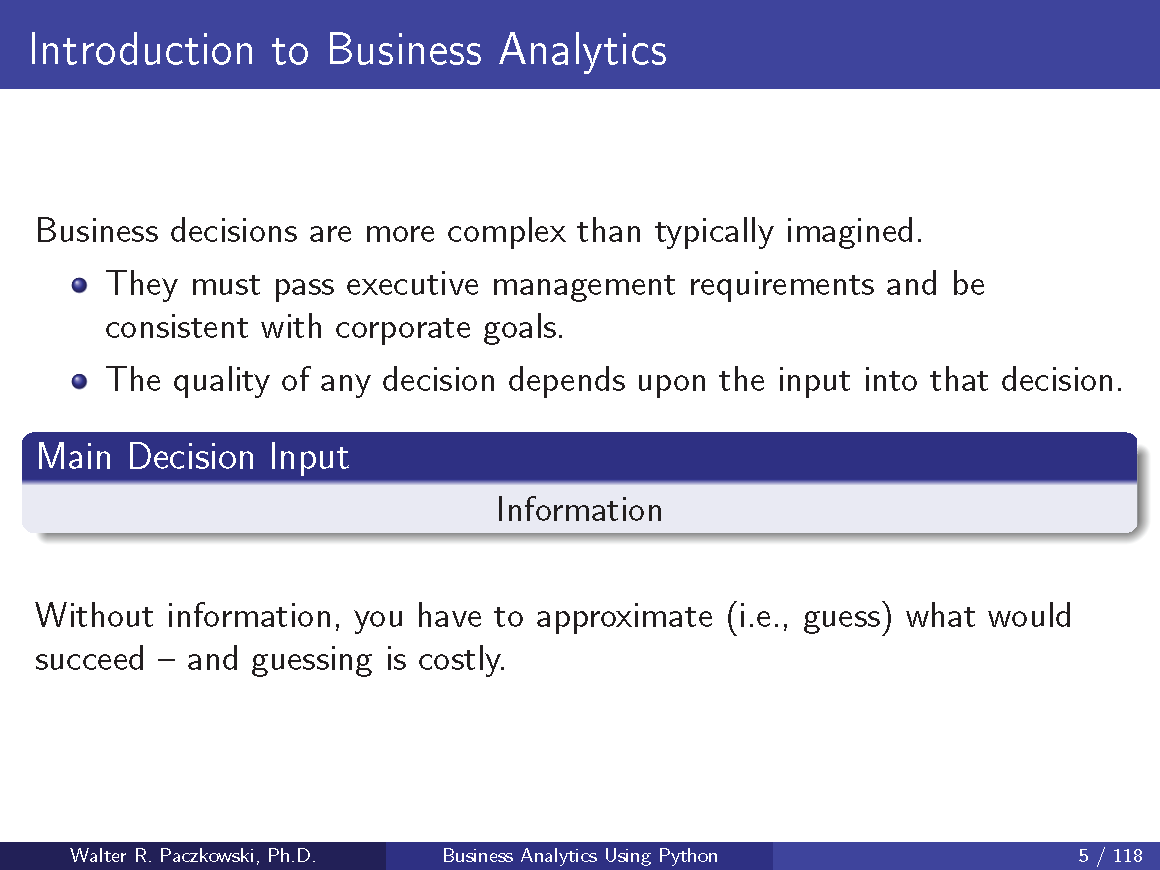

In [3]:
slide('005')

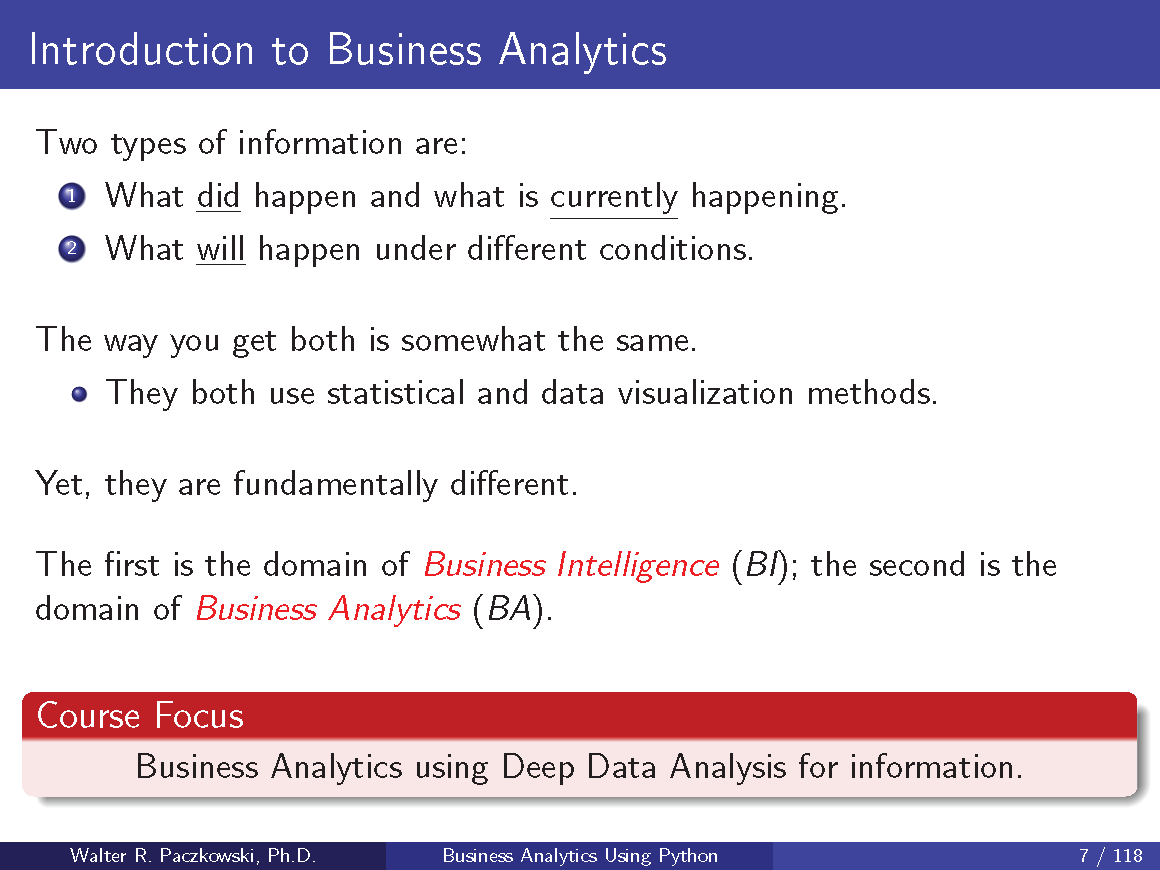

In [4]:
slide('007')

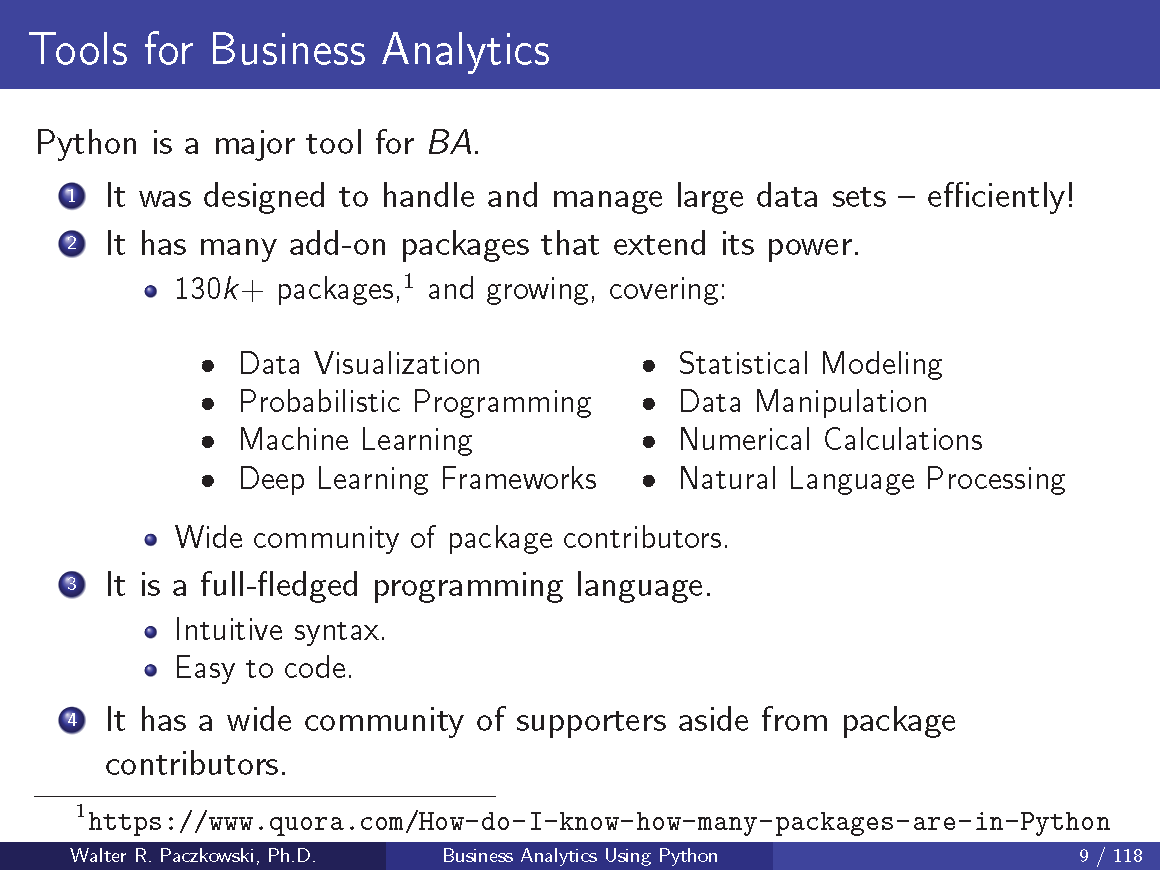

In [5]:
slide('009')

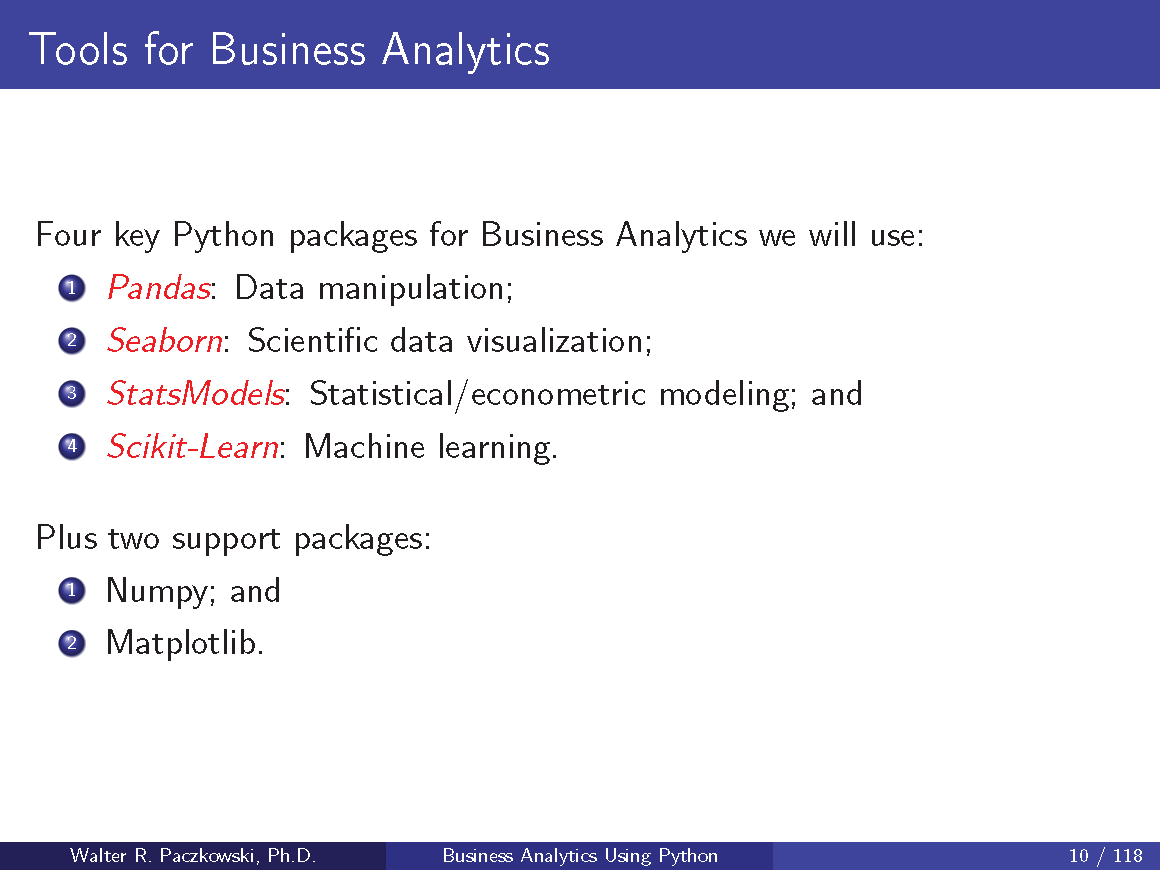

In [6]:
slide('010')

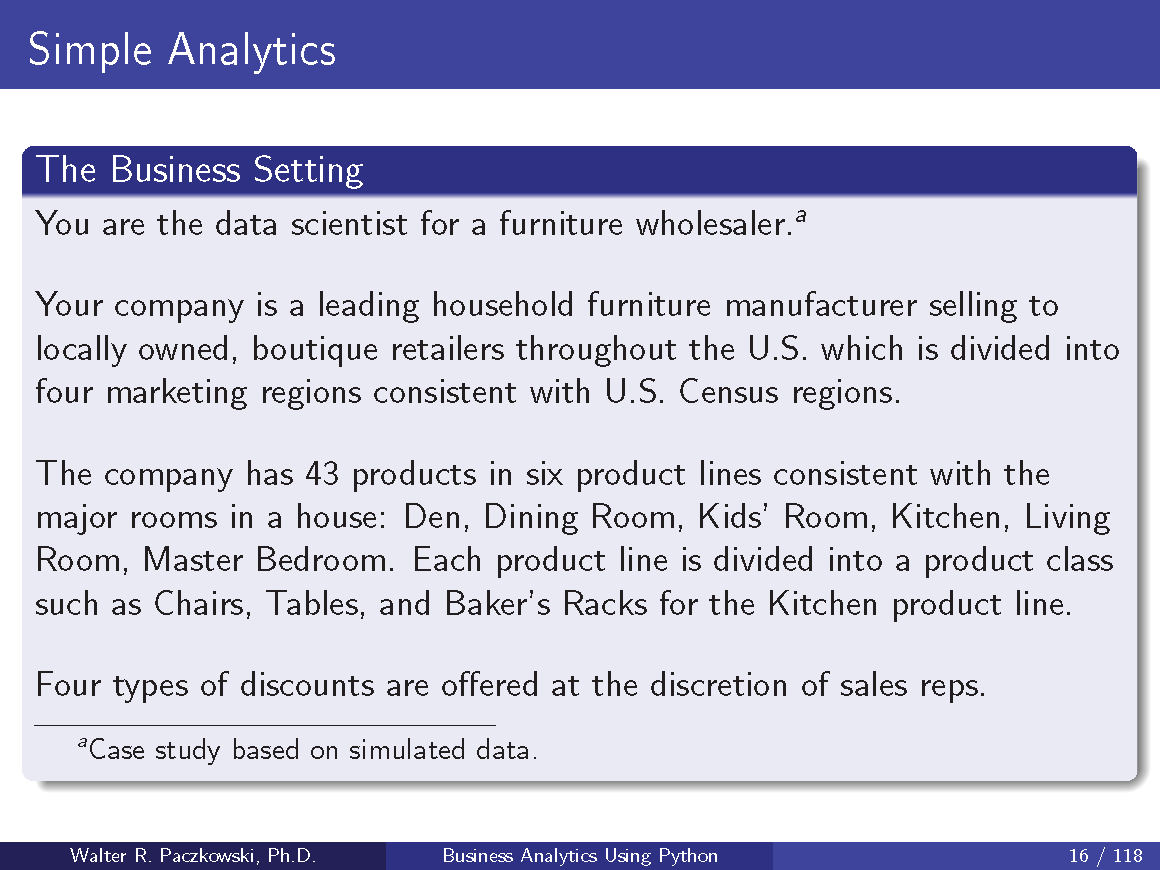

In [7]:
slide( '016' )

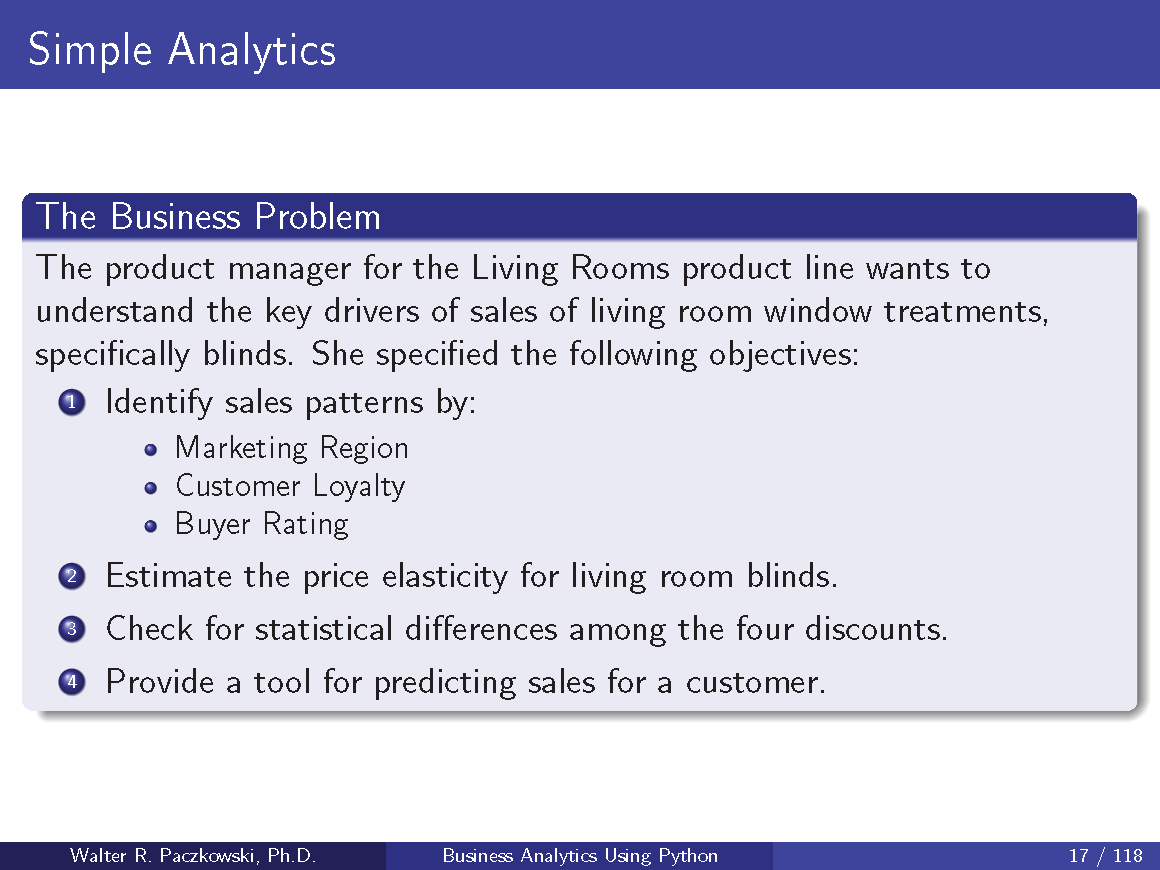

In [8]:
slide( '017' )

In [9]:
##
## Default functions
##
def boldprt( s1, s2 = None ):
    """
    Print text in bold and the return to normal.
    Args:
        s1 = string
        s2 = string, usually an f-string
    """
    bold = '\033[1m'
    normal = '\033[0m'
    if s2 == None:
        print( sc.red( s1, 'bold' ) )
    else:
        print( sc.red( s1, 'bold' ) + s2 )
##
def df_size( df ):
    """
    Display DataFrame size as nice output: rows and columns.

    Args:
        df: DataFrame handle.
    """
    data = { 'Count': [ df.shape[ 0 ], df.shape[ 1 ] ] }
    idx = [ 'Number of Rows', 'Number of Columns' ]
    display( pd.DataFrame( data, index = idx ).style.set_caption( 'DataFrame Dimensions for DataFrame ' + get_df_name( df ) ).\
            set_table_styles( tbl_styles ) )
##
def column_check( df ):
    """
    Created: 10/22/2020
    Revised: 10/22/2020
    Purpose: Counts number of characters on DataFrame column names and number of leading and trailing white spaces.
    Parameters: DataFrame
    Return: DataFrame
    """
    cols = df.columns
    n = len( cols )
    ##
    lgh = [ len( cols[ i ] ) for i in range( n ) ]
    lead = [ len( cols[ i ] ) - len( cols[ i ].lstrip() ) for i in range( n ) ]
    trail = [ len( cols[ i ] ) - len( cols[ i ].rstrip() ) for i in range( n ) ]
    ##
    dt = { 'Column Name':cols, '#Characters':lgh, 'Leading White Spaces':lead, 'Trailing White Spaces':trail}
    df_whs = pd.DataFrame( dt )
    df_whs.set_index( [ 'Column Name', '#Characters' ], inplace = True )
    ##
    return df_whs.style.bar( subset = [ 'Leading White Spaces', 'Trailing White Spaces' ], vmin = 0 ).\
        set_caption( 'DataFrame Column Check for DataFrame ' + get_df_name( df ) ).set_table_styles( tbl_styles )
##
def get_df_name( df ):
    """
    Purpose: Get DataFrame name
    Source: https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
    Parameters: DataFrame handle
    Return: DataFrame name as string
    """
    name = [ x for x in globals() if globals()[ x ] is df ][ 0 ]
    return name
##
def footer( ax ):
    """
    Purpose: Footer for graphs.  Display base and sample size.
    Parameters:
        None.  Assumes footer statement is defined as base = 'XXX'.
    """
    ax.annotate( base, ( 0, 0 ), ( 0, -0.3 ), xycoords = 'axes fraction' )
##
def tick_labels( tick ):
    """
    Modify graph ticks.

    Args:
        tick: axis x or y (lowercase).
    """
    if tick == 'y':
        vals = ax.get_yticks()
        ax.set_yticklabels( format.format( x ) for x in vals )
    else:
        vals = ax.get_xticks()
        ax.set_xticklabels( format.format( x ) for x in vals )
##
def leg( ax, ttl = None ):
    """
    Standardize location of legends.

    Args:
        ax: ax handle for graph.
        ttl: legend title.
    """
    ax.legend( title = ttl, loc = 'upper right', frameon = False, bbox_to_anchor=(1.25, 1.0) )
##
def mvReport( df ):
    """
    Calculate and display missing value report.
    Use sidetable package accessor stb.

    Args:
        df: dataFrame handle.
    """
    x = df.stb.missing( )
    ##
    ## Reorder columns and capitalize
    ##
    cols = [ 'total', 'missing', 'percent' ]
    x = x[ cols ]
    x.columns = x.columns.str.capitalize()
    ##
    ## Display
    ##
    base = 'Base: n = ' + str( df.shape[ 0 ] )
    fmt_dict = { 'Missing':'{:,.0f}', 'Total':'{:,.0f}', 'Percent':'{:.3}%' }
    display( x.style.set_caption( 'Missing Value Report').\
        format( fmt_dict ).set_table_styles( tbl_styles ) )
    print( base )
##
def highlight_nan(df):
    '''
    Highlight missing values in a DataFrames as yellow.
    '''
    return [ 'background-color: yellow' if v else '' for v in df.isna(  ) ]
##
## Default formats
##
font_title = 20
format = '{:0.1%}'
format_dollar = '${:,.2f}'
p_value = '{:0.4f}'
##
## DataFrame styles
##
tbl_styles = [ {
    'selector': 'caption',
    'props': [
        ('color', 'white'),
        ('font-size', '18px')
    ] } ]

In [10]:
pip install sidetable


In [11]:
pip install simple_colors

In [12]:
##
## ===> Data Management <===
##
import numpy as np
import pandas as pd
##
## Set an option for the number of Pandas columns to display.  Eight in this case.
##
pd.set_option( 'display.max_columns', 8 )
##
## Categroical Data Type
##
from pandas.api.types import CategoricalDtype
##
## ===> Visualization <===
##
import seaborn as sns
import matplotlib.pyplot as plt
##
## Set the seaborn grid style.
##
sns.set()
##
## ===> Speciality <===
##
## Sidetable package
##   Install with:
##     pip install sidetable
##   or
##     conda install -c conda-forge sidetable
##
import sidetable
##
## Color package
##   Install with:
##     pip install simple-colors
##
import simple_colors as sc
##
## ===> Modeling <===
##
## Import train_test_split package from sklearn
##
from sklearn.model_selection import train_test_split
##
## For modeling, notice the new import command for
## the formula API and the summary option
##
import statsmodels.api as sm
import statsmodels.formula.api as smf
##
## Import the r2_score function from the sklearn metrics package
##
from sklearn.metrics import r2_score
##
## Import confusion functions for classification
##
from sklearn.metrics import confusion_matrix, classification_report
##
## Import decision tree classifier functions
##
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
##
from sklearn.preprocessing import LabelEncoder

In [13]:
##
## Set data path.  Reset this for your local machine.
##
path = '/content/drive/MyDrive/Business_Analytics'
boldprt( 'Path set to: ', path )

Path set to: /content/drive/MyDrive/Business_Analytics


In [14]:
##
## Import your data.  The parse_dates argument says to
## treat Tdate as a date object.
##
file = '/orders.csv'
##
df_orders = pd.read_csv( path + file, parse_dates = [ 'Tdate' ] )

In [15]:
##
## How many unique CIDs are available?
##
x = df_orders.CID.nunique()
boldprt( 'Number of Unique CIDs: ', f'{x}' )

Number of Unique CIDs: 779


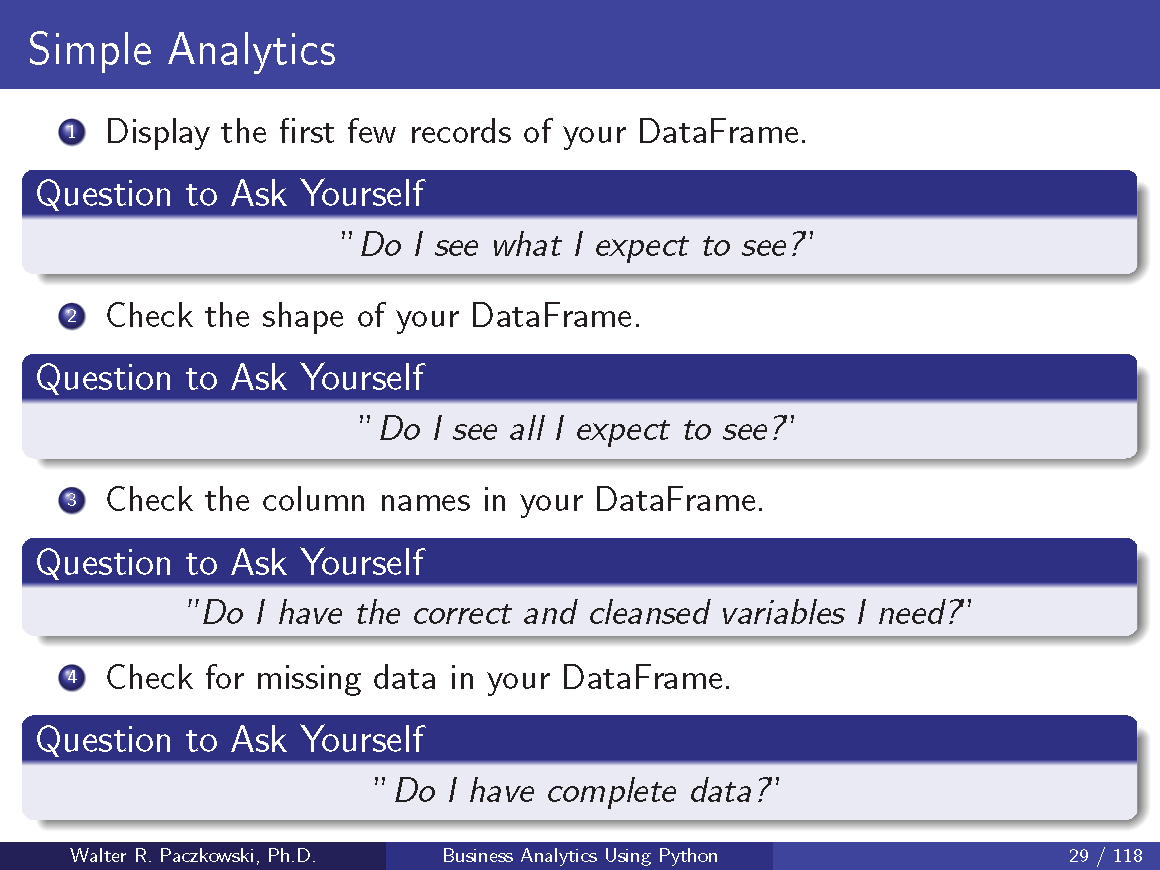

In [16]:
slide('029')

In [17]:
##
## Display DataFrame head.  Hide the index.
##
df_orders.head().style.set_caption( 'Orders Data' ).\
    set_table_styles( tbl_styles ).\
    hide_index()

<ipython-input-17-ca467000dfea>:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  hide_index()


Onum,CID,Tdate,Pline,Pclass,Usales,Return,returnAmount,Mcost,Lprice,Ddisc,Cdisc,Odisc,Pdisc
585,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,36,No,0,0.950000,5.400000,nan,nan,0.043000,0.042000
586,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,57,No,0,0.950000,5.400000,0.157000,0.075000,0.041000,0.031000
587,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,27,No,0,0.950000,5.400000,nan,0.048000,0.053000,0.021000
588,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,21,No,0,0.950000,5.400000,nan,0.072000,nan,0.033000
589,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,56,No,0,0.950000,5.400000,0.140000,0.056000,0.041000,0.055000


In [18]:
##
## Use df_size function -- See Best Practices function section
##
df_size( df_orders )

,Count
Number of Rows,70270
Number of Columns,14


In [19]:
##
## Use columns_check function -- See Best Practices function section
##
column_check( df_orders )

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in long_scalars
  end = (x - left) / (right - left)


,,Leading White Spaces,Trailing White Spaces
Column Name,#Characters,,
Onum,4,0,0
CID,3,0,0
Tdate,5,0,0
Pline,5,0,0
Pclass,6,0,0
Usales,6,0,0
Return,6,0,0
returnAmount,12,0,0
Mcost,5,0,0


## Task 4: Check for Missing Values.

In [20]:
##
## Use missing value report function -- See Best Practices function section
##
mvReport( df_orders )

,Total,Missing,Percent
Cdisc,"70,270",9,0.0128%
Ddisc,"70,270",8,0.0114%
Odisc,"70,270",4,0.00569%
Pdisc,"70,270",2,0.00285%
Onum,"70,270",0,0.0%
CID,"70,270",0,0.0%
Tdate,"70,270",0,0.0%
Pline,"70,270",0,0.0%
Pclass,"70,270",0,0.0%
Usales,"70,270",0,0.0%


Base: n = 70270


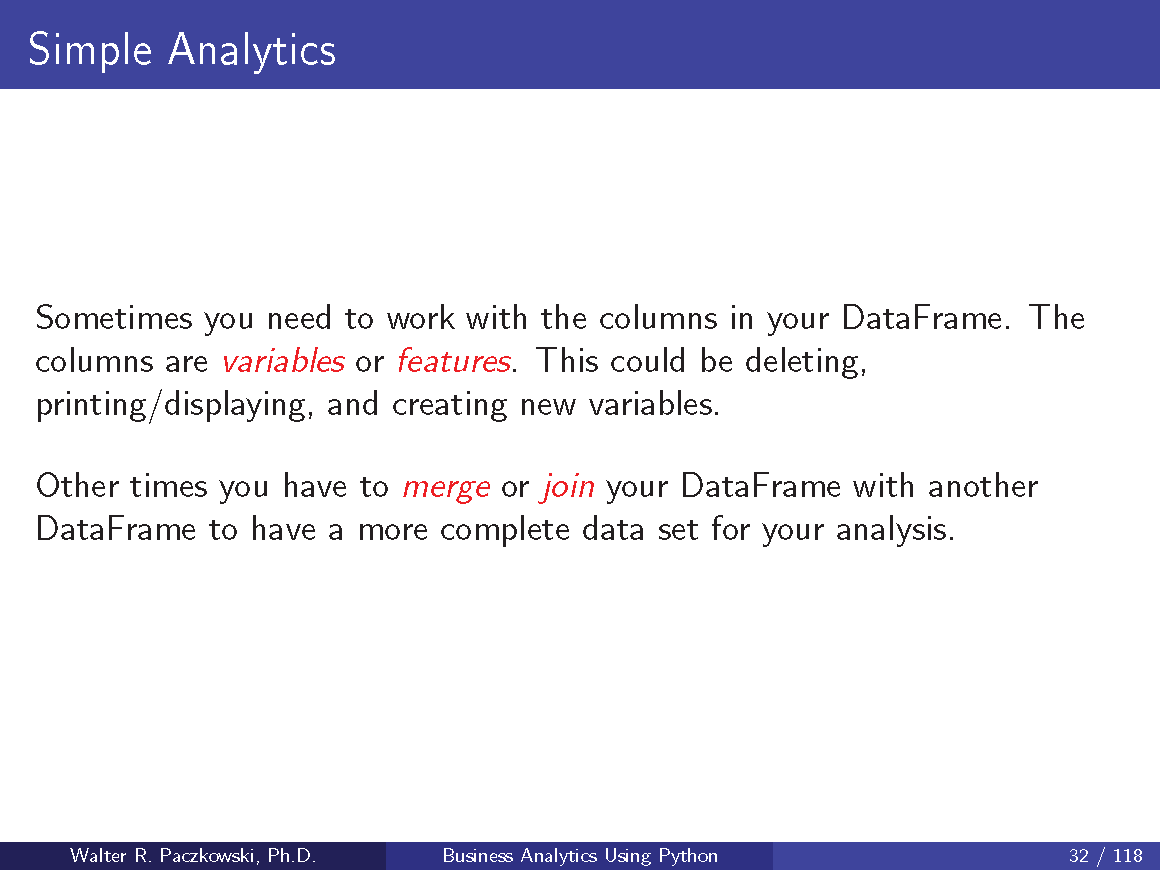

In [21]:
slide('032')

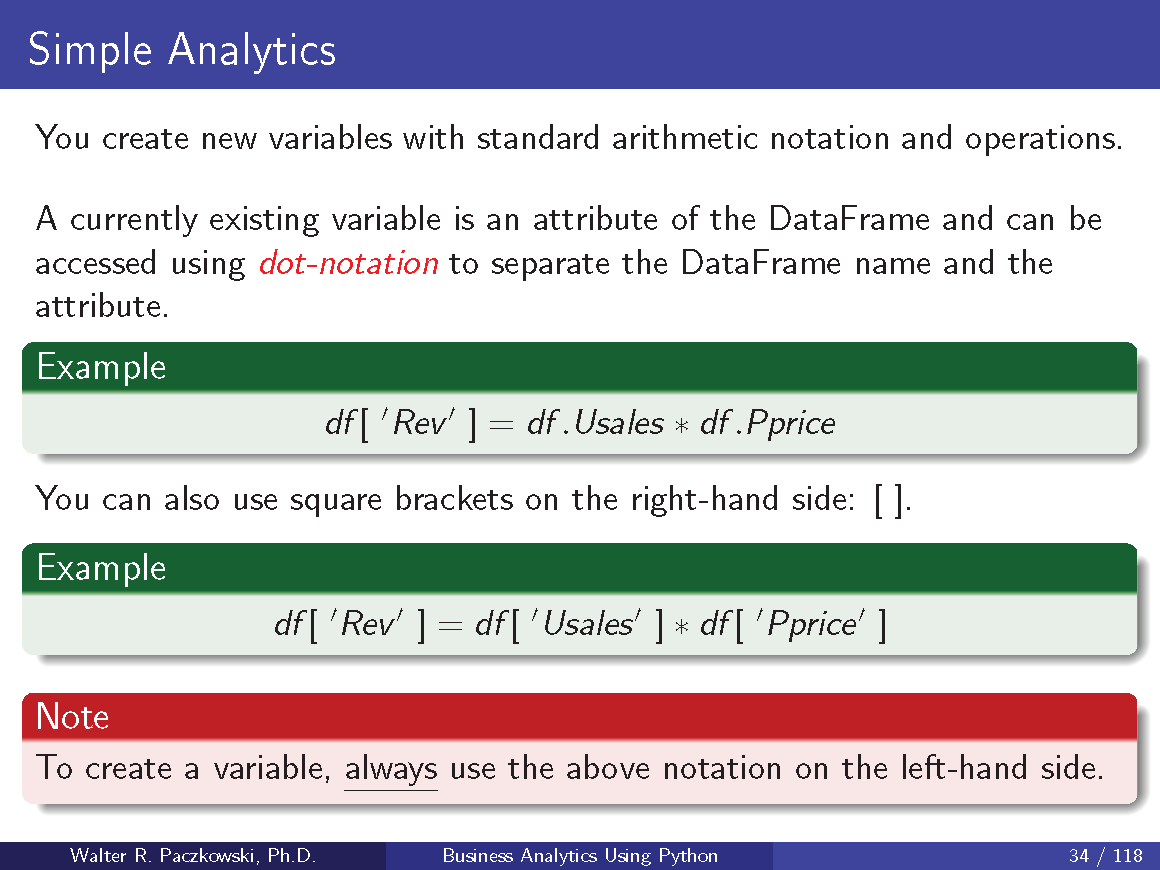

In [22]:
slide('034')

In [23]:
##
## Calculate total discount.
##
## Discounts are sometimes called "leakages" so the total is the total leakage.
##
## Note: use "axis = 1" in the sum() function to sum across columns.
## This allows you to do the summation even with missing values.
##
cols = [ 'Ddisc', 'Odisc', 'Cdisc', 'Pdisc' ]
df_orders[ 'Tdisc' ] = df_orders[ cols ].sum( axis = 1 )
##
## Display only the discounts
##    Create a list of what to print.
##
cols.append( 'Tdisc' )
df_orders[ cols ].head().style.set_caption( 'Discounts for Orders Data' ).\
    set_table_styles( tbl_styles ).\
    hide_index().apply( highlight_nan )

<ipython-input-23-30eae8fd9f01>:18: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  hide_index().apply( highlight_nan )


Ddisc,Odisc,Cdisc,Pdisc,Tdisc
nan,0.043000,nan,0.042000,0.085000
0.157000,0.041000,0.075000,0.031000,0.304000
nan,0.053000,0.048000,0.021000,0.122000
nan,nan,0.072000,0.033000,0.105000
0.140000,0.041000,0.056000,0.055000,0.292000


In [24]:
df_orders['Pprice'] = df_orders.Lprice*(1 - df_orders.Tdisc)
cols = ['Lprice', 'Tdisc','Pprice']
df_orders[cols].head()

,Lprice,Tdisc,Pprice
0,5.4,0.085,4.9410
1,5.4,0.304,3.7584
2,5.4,0.122,4.7412
3,5.4,0.105,4.8330
4,5.4,0.292,3.8232


In [25]:
df_orders['Rev'] = df_orders.Usales * df_orders.Pprice
cols = ['Usales','Pprice','Rev']
df_orders[cols].head()

,Usales,Pprice,Rev
0,36,4.9410,177.8760
1,57,3.7584,214.2288
2,27,4.7412,128.0124
3,21,4.8330,101.4930
4,56,3.8232,214.0992


In [26]:
df_orders['Con'] = df_orders.Rev - df_orders.Mcost
df_orders['CM'] = df_orders.Con/df_orders.Rev
cols = ['Usales','Pprice','Mcost','Rev','Con','CM']
df_orders[cols].head()

,Usales,Pprice,Mcost,Rev,Con,CM
0,36,4.9410,0.95,177.8760,176.9260,0.994659
1,57,3.7584,0.95,214.2288,213.2788,0.995565
2,27,4.7412,0.95,128.0124,127.0624,0.992579
3,21,4.8330,0.95,101.4930,100.5430,0.990640
4,56,3.8232,0.95,214.0992,213.1492,0.995563


In [27]:
df_orders['netRev'] = (df_orders.Usales - df_orders.returnAmount) * df_orders.Pprice
df_orders['lostRev'] = df_orders.Rev - df_orders.netRev
cols = ['Rev','netRev','lostRev']
df_orders[cols].head()

,Rev,netRev,lostRev
0,177.8760,177.8760,0.0
1,214.2288,214.2288,0.0
2,128.0124,128.0124,0.0
3,101.4930,101.4930,0.0
4,214.0992,214.0992,0.0


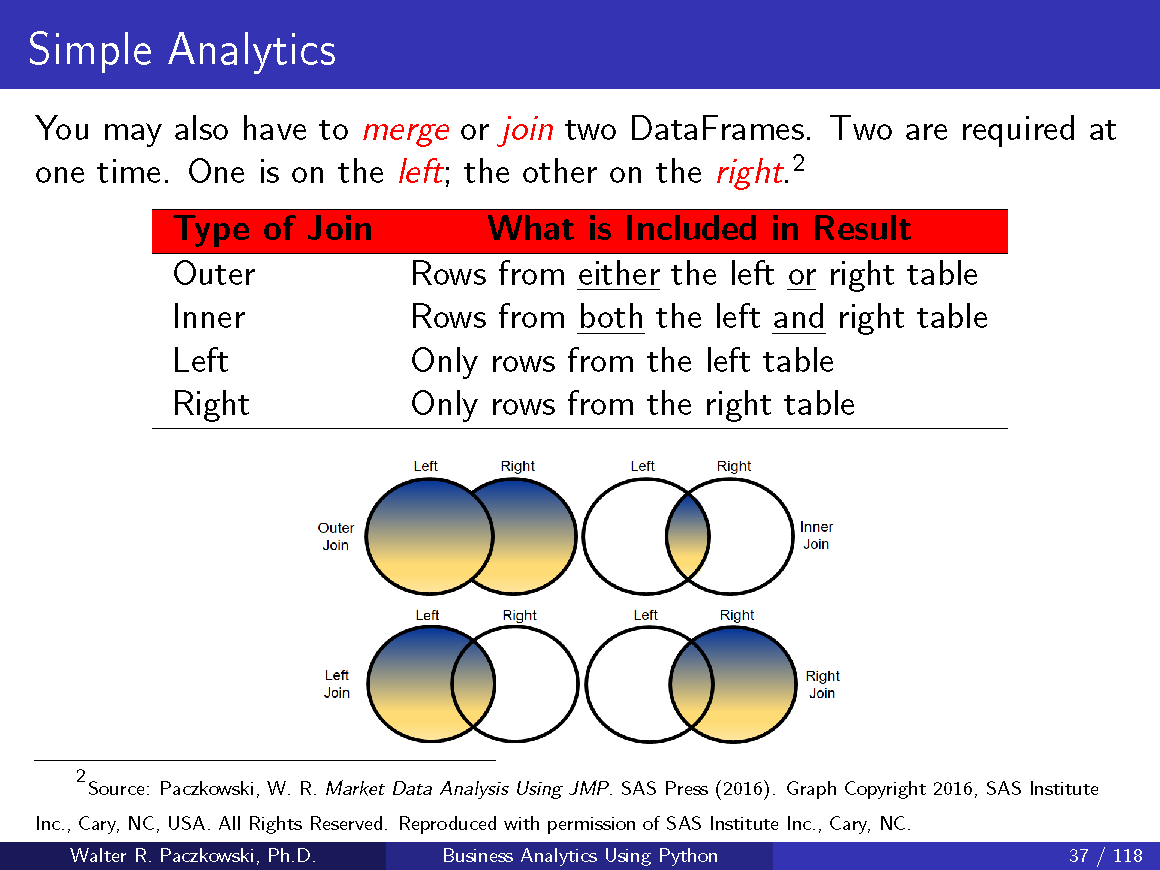

In [28]:
slide('037')

In [29]:
##
## Import a second DataFrame on the customers
##
file = '/customers.csv'
df_cust = pd.read_csv( path + file )
df_cust.head().style.set_caption( 'Customer DataFrame' ).\
    set_table_styles( tbl_styles ).\
    hide_index()

<ipython-input-29-432d281f8bc7>:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  hide_index()


CID,State,ZIP,Region,loyaltyProgram,buyerRating,buyerSatisfaction
1700,MT,59821,West,Yes,Excellent,4
850,ND,58068,Midwest,Yes,Excellent,4
280,NY,10007,Northeast,Yes,Excellent,3
1574,WY,83120,West,No,Good,4
110,CO,80403,West,Yes,Excellent,4


In [30]:
##
## Do an inner join using CID as the link
##
df_orders_cust = pd.merge( df_orders, df_cust, on = 'CID' )
##
df_orders_cust.head().style.set_caption( 'Merged Orders-Customers DataFrame' ).\
    set_table_styles( tbl_styles ).\
    hide_index()

<ipython-input-30-7ea7218f4a1d>:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  hide_index()


Onum,CID,Tdate,Pline,Pclass,Usales,Return,returnAmount,Mcost,Lprice,Ddisc,Cdisc,Odisc,Pdisc,Tdisc,Pprice,Rev,Con,CM,netRev,lostRev,State,ZIP,Region,loyaltyProgram,buyerRating,buyerSatisfaction
585,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,36,No,0,0.950000,5.400000,nan,nan,0.043000,0.042000,0.085000,4.941000,177.876000,176.926000,0.994659,177.876000,0.000000,MI,49093,Midwest,Yes,Good,2
586,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,57,No,0,0.950000,5.400000,0.157000,0.075000,0.041000,0.031000,0.304000,3.758400,214.228800,213.278800,0.995565,214.228800,0.000000,MI,49093,Midwest,Yes,Good,2
587,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,27,No,0,0.950000,5.400000,nan,0.048000,0.053000,0.021000,0.122000,4.741200,128.012400,127.062400,0.992579,128.012400,0.000000,MI,49093,Midwest,Yes,Good,2
588,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,21,No,0,0.950000,5.400000,nan,0.072000,nan,0.033000,0.105000,4.833000,101.493000,100.543000,0.990640,101.493000,0.000000,MI,49093,Midwest,Yes,Good,2
589,1015,2004-01-25 00:00:00,Living Room,Window Treatment: Blinds,56,No,0,0.950000,5.400000,0.140000,0.056000,0.041000,0.055000,0.292000,3.823200,214.099200,213.149200,0.995563,214.099200,0.000000,MI,49093,Midwest,Yes,Good,2


In [31]:
##
## Check the shape of the new DataFrame against
## that of the orders and customers DataFrames
##
boldprt( 'Shape of the Orders DataFrame:' )
df_size( df_orders )
##
boldprt( '\nShape of the Customers DataFrame:' )
df_size( df_cust )
##
boldprt( '\nShape of the Merged DataFrame:' )
df_size( df_orders_cust )
##
## Find the number of unique CIDs
##
x = df_orders_cust.CID.nunique()
boldprt( '\nNumber of Unique CIDs in Merged DataFrame: ', f'{x}' )

Shape of the Orders DataFrame:


,Count
Number of Rows,70270
Number of Columns,21



Shape of the Customers DataFrame:


,Count
Number of Rows,1136
Number of Columns,7



Shape of the Merged DataFrame:


,Count
Number of Rows,70270
Number of Columns,27



Number of Unique CIDs in Merged DataFrame: 779


In [32]:
df_marketing = pd.read_csv(path + '/marketing.csv')
df_marketing.head()

,CID,loyaltyProgram,buyerRating,buyerSatisfaction
0,1700,Yes,Excellent,4
1,850,Yes,Excellent,4
2,280,Yes,Excellent,3
3,1574,No,Good,4
4,110,Yes,Excellent,4


In [33]:
df = pd.merge(df_orders_cust, df_marketing, on = 'CID')
df.head()

,Onum,CID,Tdate,Pline,...,buyerSatisfaction_x,loyaltyProgram_y,buyerRating_y,buyerSatisfaction_y
0,585,1015,2004-01-25,Living Room,...,2,Yes,Good,2
1,586,1015,2004-01-25,Living Room,...,2,Yes,Good,2
2,587,1015,2004-01-25,Living Room,...,2,Yes,Good,2
3,588,1015,2004-01-25,Living Room,...,2,Yes,Good,2
4,589,1015,2004-01-25,Living Room,...,2,Yes,Good,2


In [34]:
df_size(df)

,Count
Number of Rows,70270
Number of Columns,30


In [35]:
x = df_orders.CID.nunique()
boldprt('Number of unique CIDs: ',f'{x}')

Number of unique CIDs: 779


In [36]:
boldprt('Summary Statistics: ')
df.describe().T

Summary Statistics: 


,count,mean,std,min,25%,50%,75%,max
Onum,70270.0,575909.018742,338022.118142,585.000000,288425.250000,560855.50000,879314.750000,1.173642e+06
CID,70270.0,1311.250021,761.513895,14.000000,636.000000,1279.50000,2011.000000,2.626000e+03
Usales,70270.0,30.997310,18.953480,2.000000,18.000000,26.00000,39.000000,3.380000e+02
returnAmount,70270.0,3.151188,8.908806,0.000000,0.000000,0.00000,0.000000,1.580000e+02
Mcost,70270.0,1.246712,0.182570,0.950000,1.080000,1.27000,1.330000,1.530000e+00
Lprice,70270.0,7.124275,1.043404,5.400000,6.180000,7.23000,7.600000,8.760000e+00
Ddisc,70262.0,0.122091,0.040884,0.045000,0.086000,0.11600,0.157000,2.150000e-01
Cdisc,70261.0,0.069948,0.020182,0.035000,0.053000,0.07000,0.087000,1.050000e-01
Odisc,70266.0,0.050036,0.014451,0.025000,0.038000,0.05000,0.063000,7.500000e-02
Pdisc,70268.0,0.039978,0.011547,0.020000,0.030000,0.04000,0.050000,6.000000e-02


# Part 2 : Data Visualization



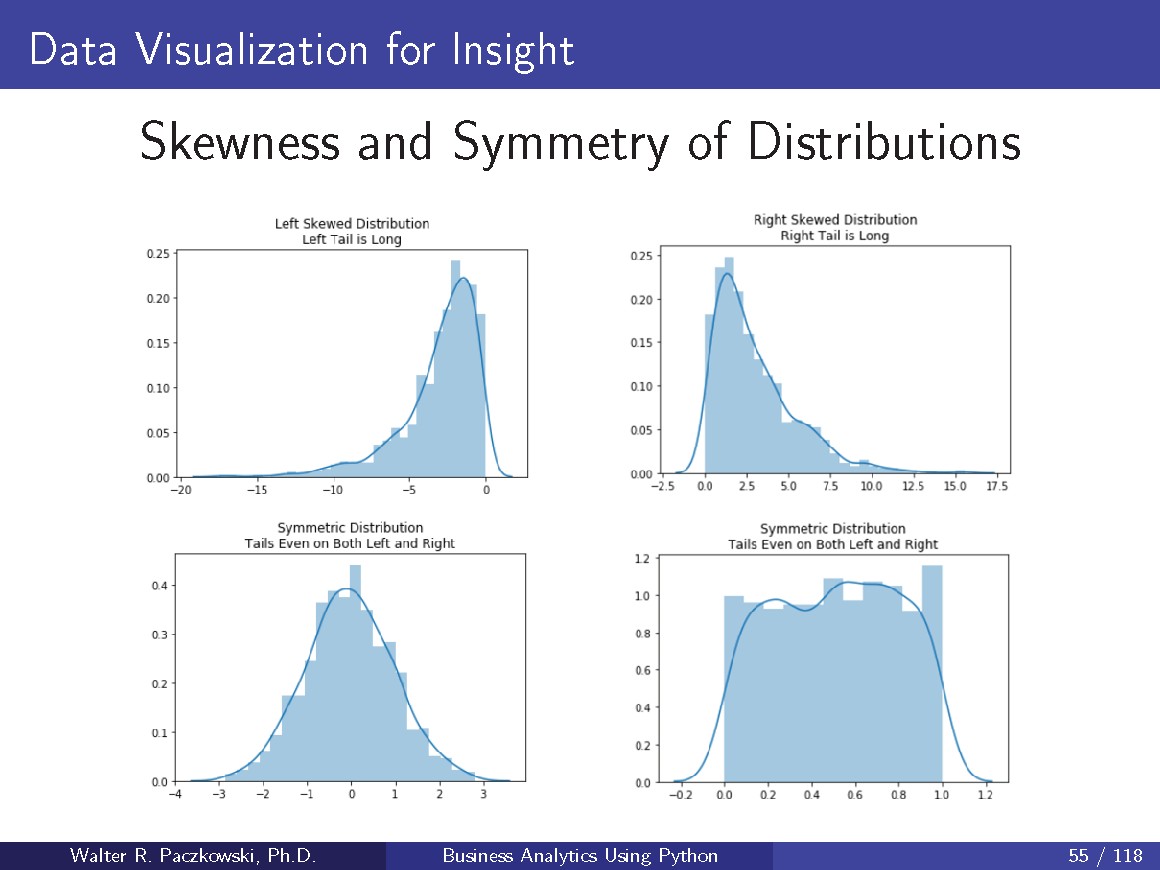

In [37]:
slide('055')

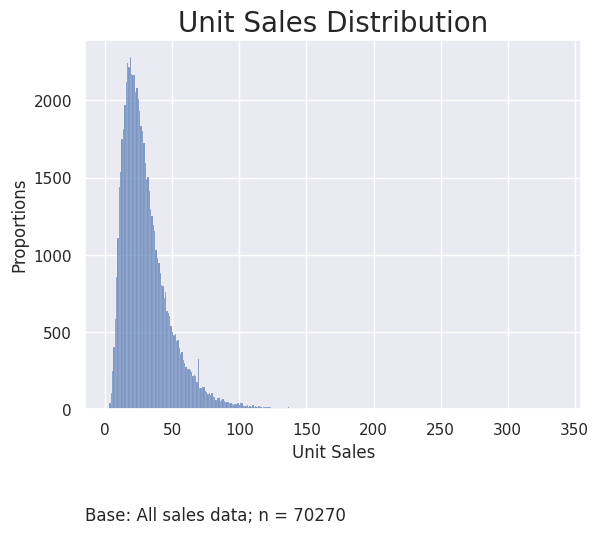

In [38]:


# Set the font size for the title
#font_title = 12

# Create the histogram
base = 'Base: All sales data; n = ' + str(len(df.Usales))
ax = sns.histplot(df.Usales)
ax.set_title('Unit Sales Distribution', fontsize=font_title)
ax.set(xlabel='Unit Sales', ylabel='Proportions')

# Assuming you have a function named 'footer' for adding a footer to the plot
# Make sure you have defined the 'footer' function or remove this line if it's not needed
footer(ax);

# Show the histogram
#plt.show()


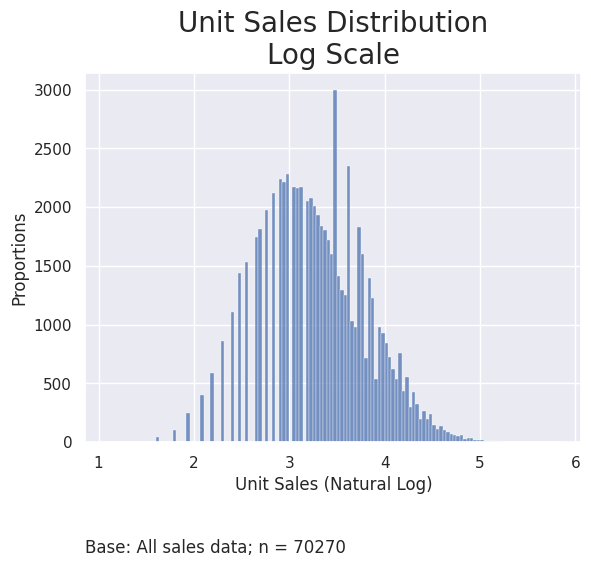

In [39]:
##
## Plot the natural log of unit sales
## A KDE curve is included by default
##
base = 'Base: All sales data; n = ' + str( len( df.Usales ) )
ax = sns.histplot( np.log1p( df.Usales ) )
ax.set_title( 'Unit Sales Distribution\nLog Scale', fontsize = font_title )
ax.set( xlabel = 'Unit Sales (Natural Log)', ylabel = 'Proportions' )
footer( ax );

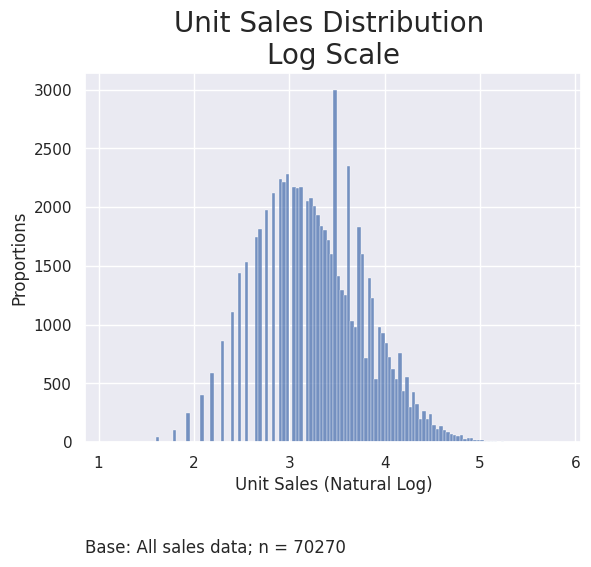

In [40]:
base = 'Base: All sales data; n = ' + str(len(df.Usales))
ax = sns.histplot(np.log1p(df.Usales))
ax.set_title('Unit Sales Distribution \nLog Scale', fontsize = font_title)
ax.set(xlabel = 'Unit Sales (Natural Log)', ylabel = 'Proportions')
footer(ax);

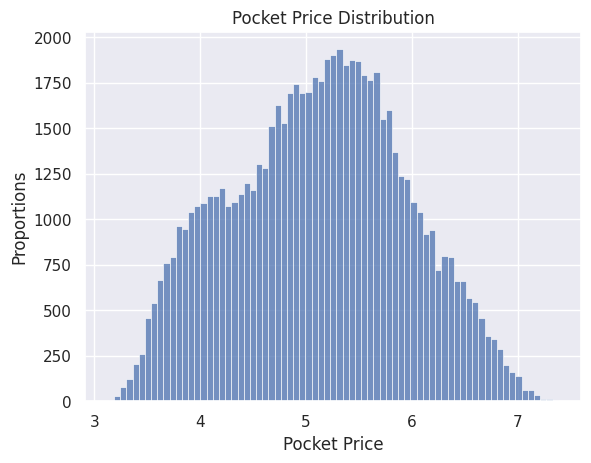

In [41]:
ax = sns.histplot(df.Pprice)
ax.set(title = "Pocket Price Distribution",
       xlabel = 'Pocket Price',
       ylabel = 'Proportions');

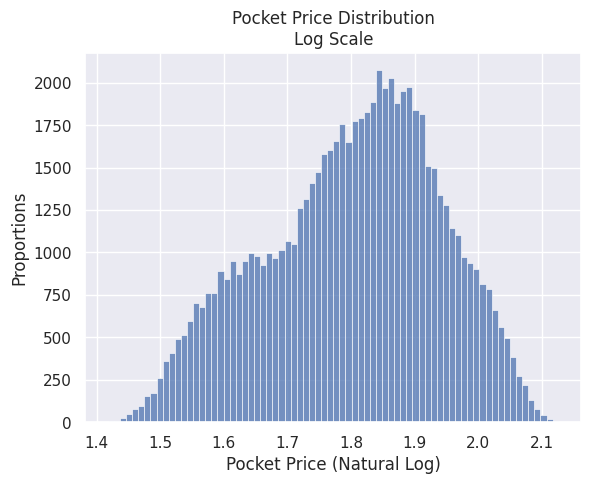

In [42]:
ax = sns.histplot(np.log1p(df.Pprice))
ax.set(title = "Pocket Price Distribution\nLog Scale",
       xlabel = 'Pocket Price (Natural Log)',
       ylabel = 'Proportions');

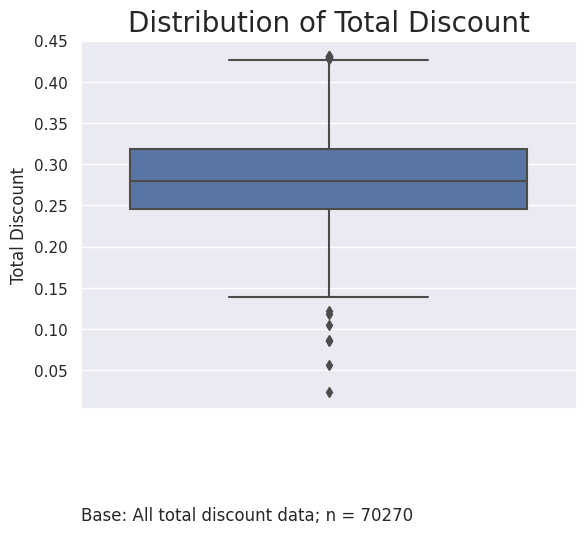

In [43]:
##
## Display the boxplot for total discounts
##
base = 'Base: All total discount data; n = ' + str( len( df.Tdisc ) )
ax = sns.boxplot( y = 'Tdisc', data = df )
ax.set_title( 'Distribution of Total Discount', fontsize = font_title)
ax.set( ylabel = 'Total Discount' )
footer( ax );

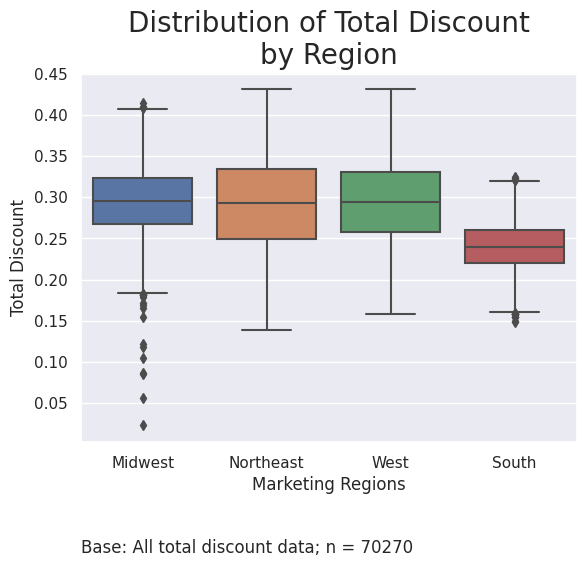

In [44]:
##
## Total discount distribution by regions
##
base = 'Base: All total discount data; n = ' + str( len( df.Tdisc ) )
ax = sns.boxplot( x = 'Region', y = 'Tdisc', data = df )
ax.set_title( 'Distribution of Total Discount\nby Region', fontsize = font_title )
ax.set( ylabel = 'Total Discount', xlabel = 'Marketing Regions' )
footer( ax );

Summary Statistics for the Discounts:

            value                                                      
            count      mean       std    min    25%   50%    75%    max
variable                                                               
Cdisc     15831.0  0.069813  0.020228  0.035  0.052  0.07  0.087  0.105
Ddisc     15831.0  0.079939  0.008658  0.065  0.072  0.08  0.087  0.095
Odisc     15831.0  0.050175  0.014507  0.025  0.038  0.05  0.063  0.075
Pdisc     15831.0  0.040134  0.011540  0.020  0.030  0.04  0.050  0.060


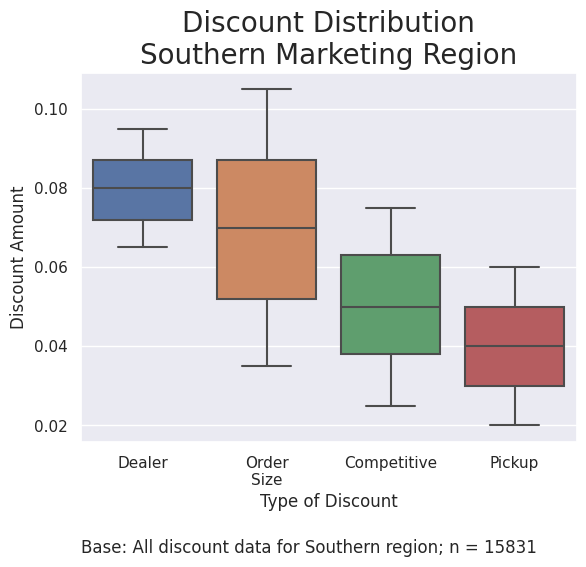

In [45]:
##
## Drill down on the discounts in the Southern Region
##
## Select the discounts for the Southern Region
##
cols = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
df_south = df.query( "Region == 'South'" )[ cols ]
##
## Melt the data from wide- to long-form.
##
df_melt = pd.melt( df_south )
##
## Get summary statistics
##
df_grp = df_melt.groupby( 'variable' ).describe()
boldprt( 'Summary Statistics for the Discounts:\n', f'\n{df_grp}' )
##
## Use a boxplot to examine the distributions.
##
base = 'Base: All discount data for Southern region; n = ' + str( df_south.shape[ 0 ] )
ax = sns.boxplot( x = 'variable', y = 'value', data = df_melt )
ax.set_title( 'Discount Distribution\nSouthern Marketing Region', fontsize = font_title )
ax.set( xlabel = 'Type of Discount', ylabel = 'Discount Amount')
footer( ax )
##
## Reset the tick labels to more meaningful labels
##
ax.set_xticklabels( [ 'Dealer', 'Order\nSize', 'Competitive', 'Pickup' ] );

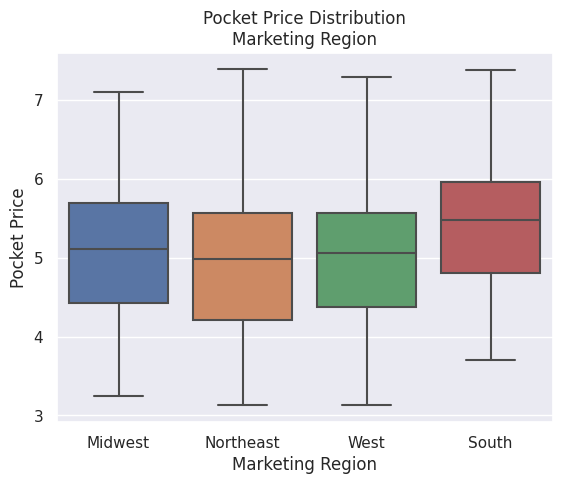

In [51]:
#pocket price by region

ax = sns.boxplot(x = "Region", y = "Pprice", data = df)
ax.set( title = 'Pocket Price Distribution\nMarketing Region',
       xlabel = 'Marketing Region',
        ylabel = 'Pocket Price');

In [53]:
# Pocket Price by Loyalty Program

#ax = sns.boxplot(x = "loyaltyProgram", y = 'Pprice', data = df)
#ax.set(title = 'Pocket Price Distribution\nLoyalty Program Membership',
#       xlabel = 'Loyalty Program Membership',
 #      ylabel = 'Pocket Price');

In [54]:
# Pocket Price by Buyer rating Program

#ax = sns.boxplot(x = "buyerRating", y = 'Pprice', data = df, order = ['Poor','Good','Excellent'])
#ax.set(title = 'Pocket Price Distribution\nBuyer Rating',
       #xlabel = 'Buyer Rating',
       #ylabel = 'Pocket Price');

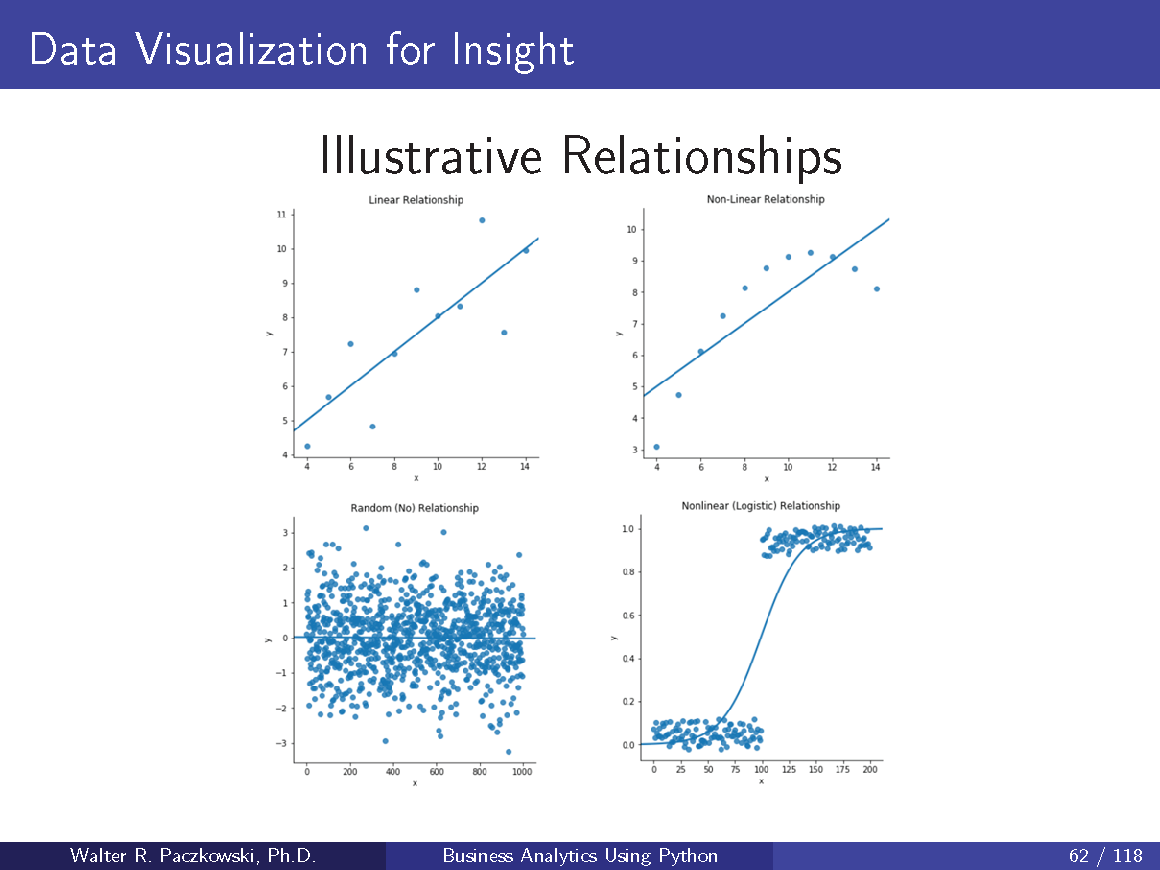

In [55]:
slide('062')

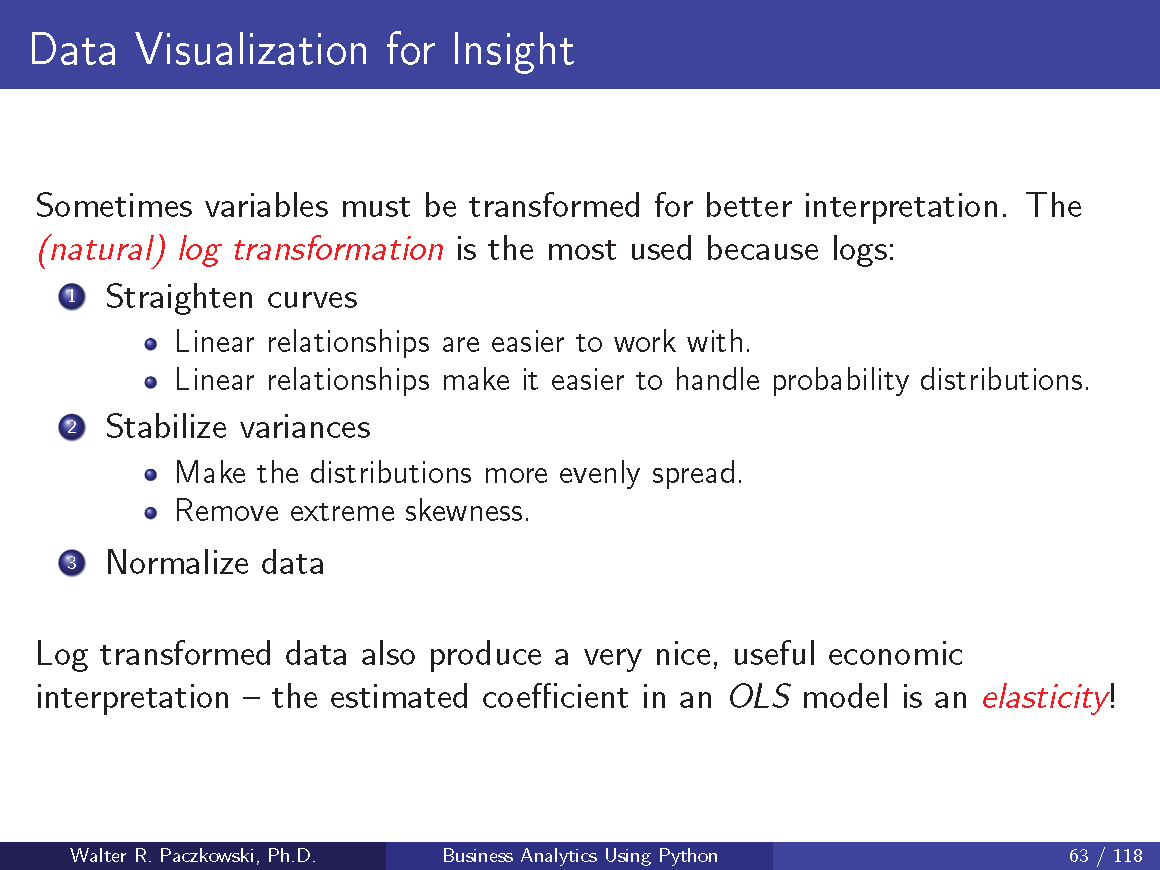

In [56]:
slide('063')

In [57]:
##
## Transform unit sales and pocket price
##
df[ 'log_Pprice' ] = np.log1p( df.Pprice )
df[ 'log_Usales' ] = np.log1p( df.Usales )
##
## Display the unlogged and logged data
##
cols = [ 'Pprice', 'log_Pprice', 'Usales', 'log_Usales' ]
df[ cols ].head().style.set_caption( 'Sales and Price Data' ).\
    set_table_styles( tbl_styles ).\
    hide_index()

<ipython-input-57-2c1d1bd4db24>:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  hide_index()


Pprice,log_Pprice,Usales,log_Usales
4.941000,1.781877,36,3.610918
3.758400,1.559911,57,4.060443
4.741200,1.747668,27,3.332205
4.833000,1.763531,21,3.091042
3.823200,1.573438,56,4.043051


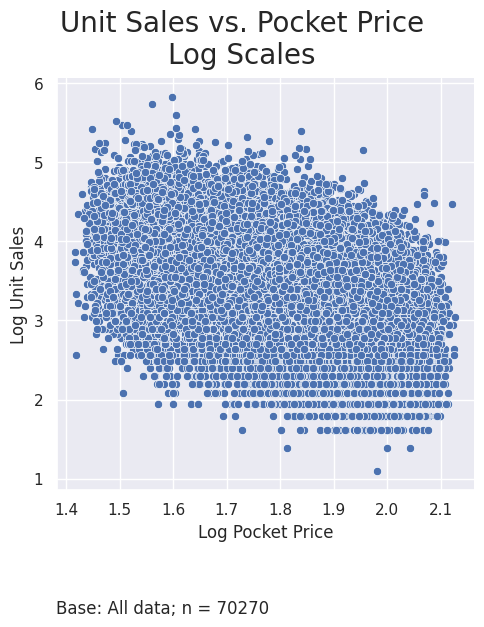

In [58]:
##
## Plot the logged data
## Use the Seaborn "relplot" function
##
base = 'Base: All data; n = ' + str( df.shape[ 0 ] )
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', data = df )
plt.suptitle( 'Unit Sales vs. Pocket Price\nLog Scales', y = 1.10, fontsize = font_title )
ax.set( xlabel = 'Log Pocket Price', ylabel = 'Log Unit Sales' )
footer( plt );

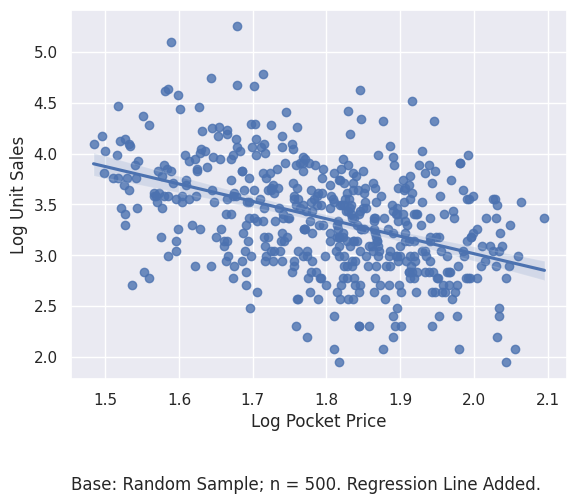

In [59]:
#Draw a random sample of size n = 500
#Put the sample in a new DataFrame

smpl = df.sample(n = 500, random_state = 42, replace = False)

#Plot the Data Using the Random Sample

base = 'Base: Random Sample; n = 500. Regression Line Added. '
ax = sns.regplot(x = 'log_Pprice', y = 'log_Usales', data = smpl)
ax.set(xlabel = 'Log Pocket Price', ylabel = 'Log Unit Sales')
footer(ax);

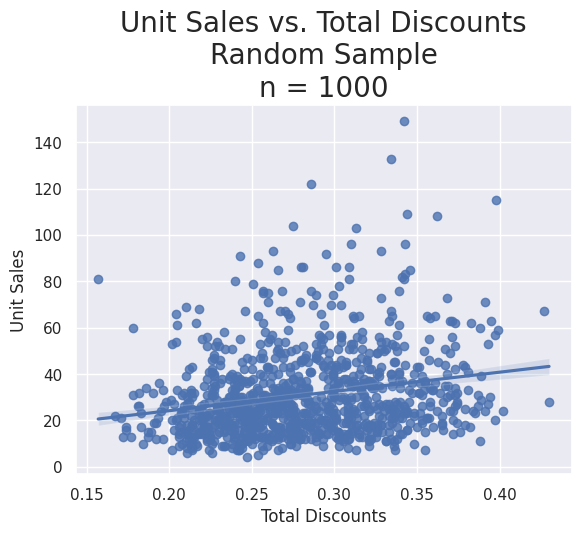

In [60]:
#Question = Create a random sample of n = 1000 and plot unit sales vs. total discounts(Tdics). What do you conclude?

smpl = df.sample(n = 1000, random_state = 1234 )

ax = sns.regplot(x = 'Tdisc', y = 'Usales', data = smpl)
ax.set_title('Unit Sales vs. Total Discounts\nRandom Sample\nn = 1000', fontsize = font_title)
ax.set(ylabel = 'Unit Sales', xlabel = 'Total Discounts');

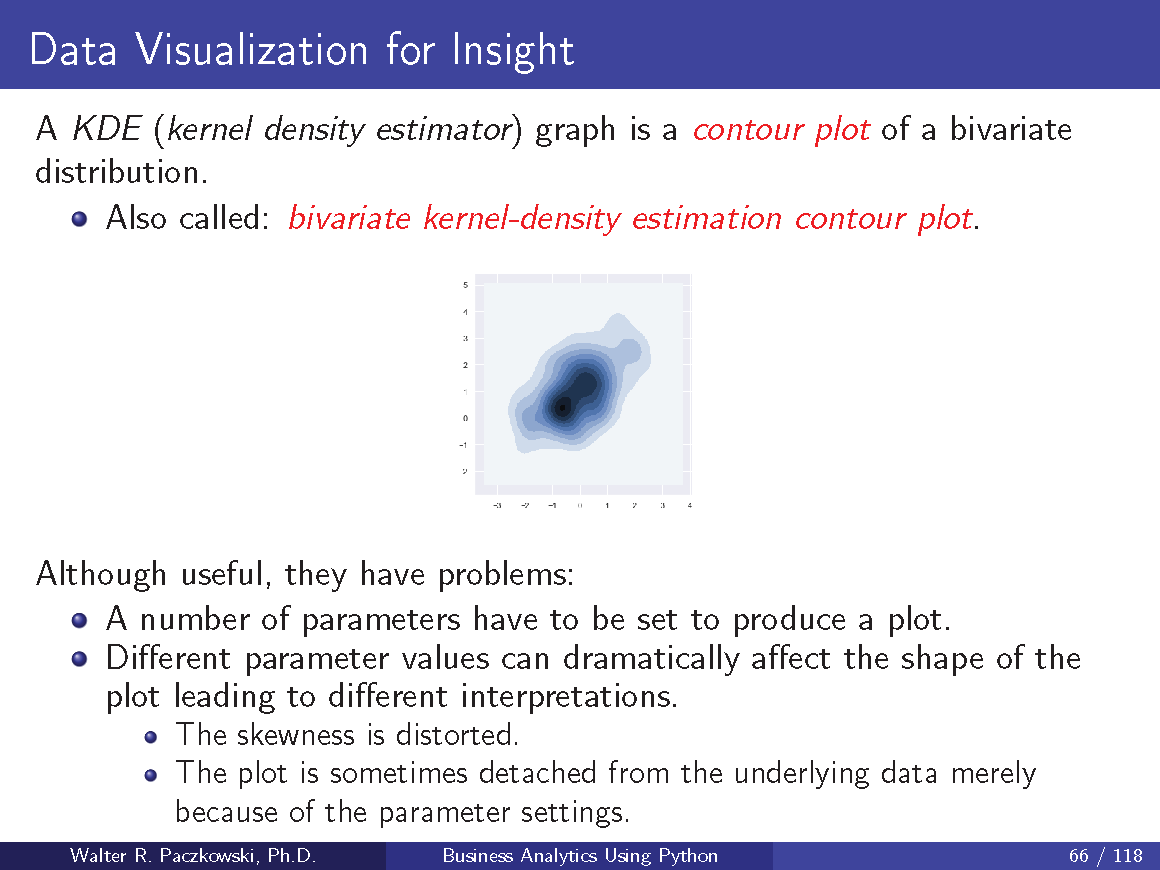

In [61]:
slide('066')

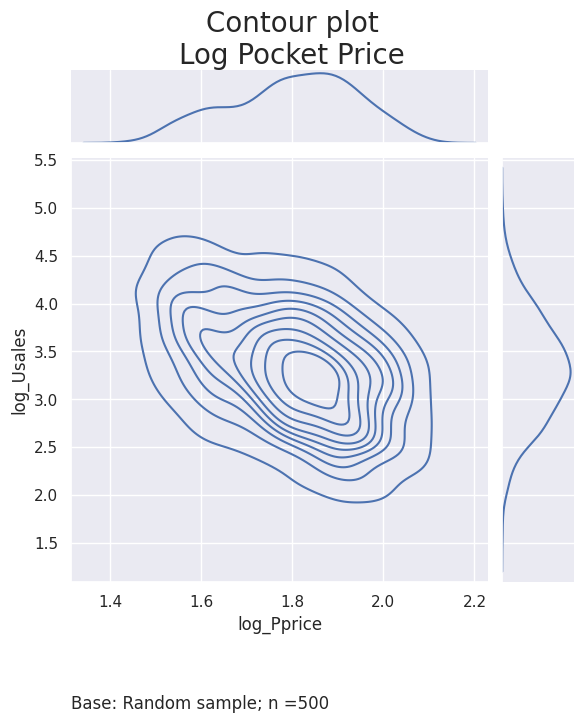

In [62]:
#Study the relationship between Total Discount (Tdisc) and the pocket price (Pprice).
#Use a random sample of  n=200 . Let the pocket price be on the vertical axis. What can you conclude?


base = 'Base: Random sample; n =500'
ax = sns.jointplot(x = 'log_Pprice', y = 'log_Usales', kind = 'kde', data = smpl)
plt.suptitle('Contour plot\nLog Pocket Price', y = 1.07, fontsize = font_title)
footer(plt);

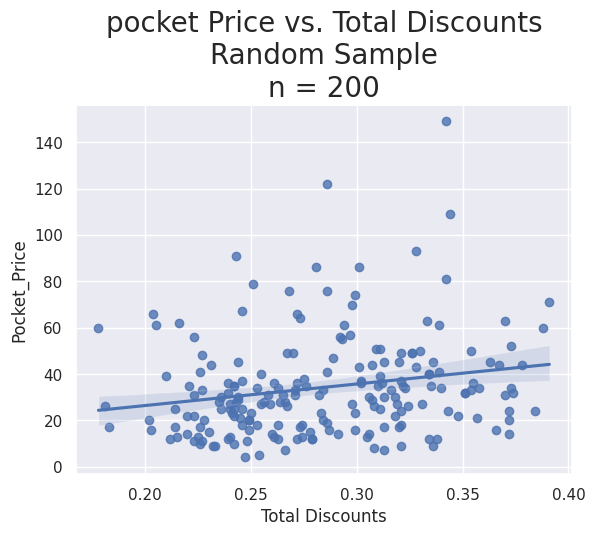

In [63]:
#Study the relationship between Total Discount (Tdisc) and the pocket price (Pprice).
#Use a random sample of  n=200 . Let the pocket price be on the vertical axis. What can you conclude?

smpl = df.sample(n = 200, random_state = 1234 )

ax = sns.regplot(x = 'Tdisc', y = 'Usales', data = smpl)
ax.set_title('pocket Price vs. Total Discounts\nRandom Sample\nn = 200', fontsize = font_title)
ax.set(xlabel = 'Total Discounts', ylabel = 'Pocket_Price', );

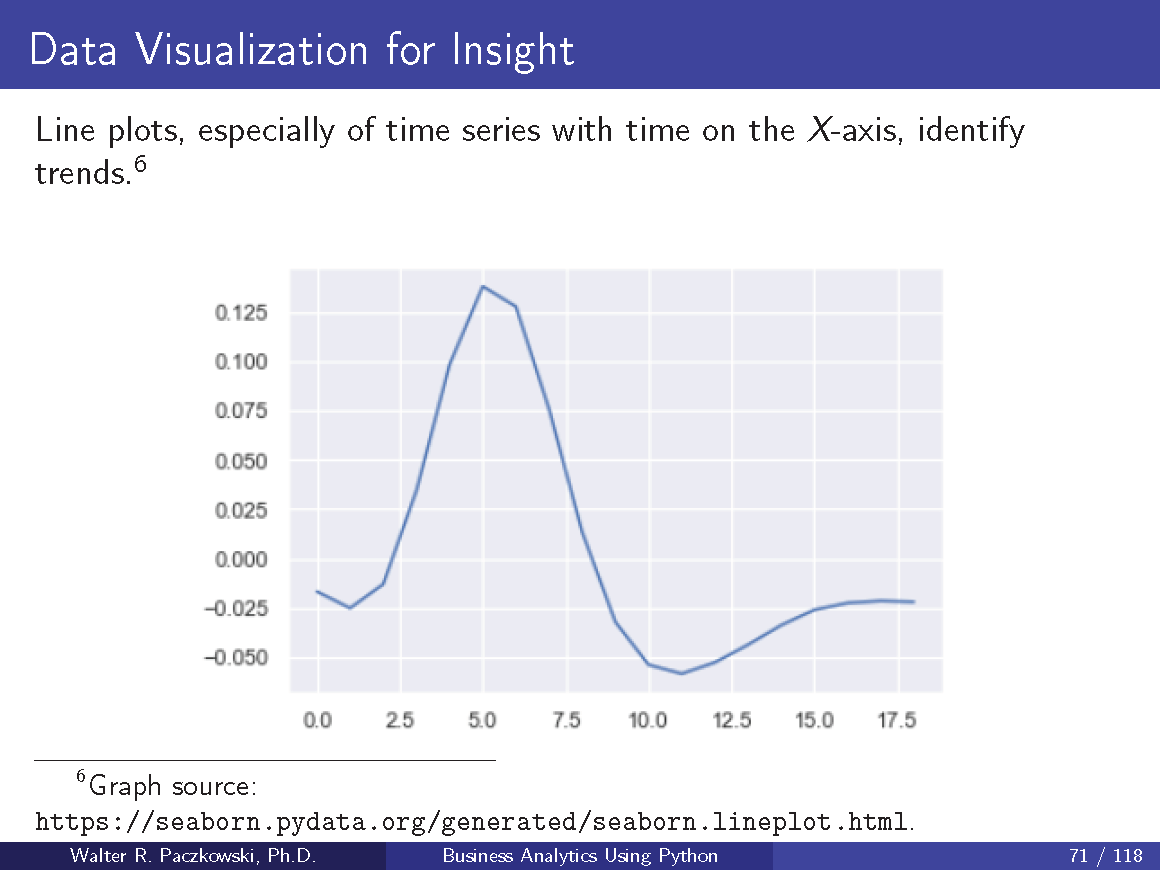

In [64]:
slide('071')

In [65]:
##
## Subset the date indicator and the Dealer discount
##
cols = [ 'Tdate', 'Ddisc' ]
df_disc = df[ cols ].copy()
##
## Reset the index to the date
##
df_disc.set_index( 'Tdate', inplace = True )
df_disc.head()

,Ddisc
Tdate,
2004-01-25,NaN
2004-01-25,0.157
2004-01-25,NaN
2004-01-25,NaN
2004-01-25,0.140


In [66]:
##
## Group the data by months and calculate the
## mean discount for each month.
##
df_grp = df_disc.resample( 'M' ).mean().to_period( 'M' )
df_grp.head().style.set_caption( 'Grouped Data' ).\
    set_table_styles( tbl_styles )

,Ddisc
Tdate,
2003-06,0.108419
2003-07,0.107782
2003-08,0.112491
2003-09,0.115927
2003-10,0.122851


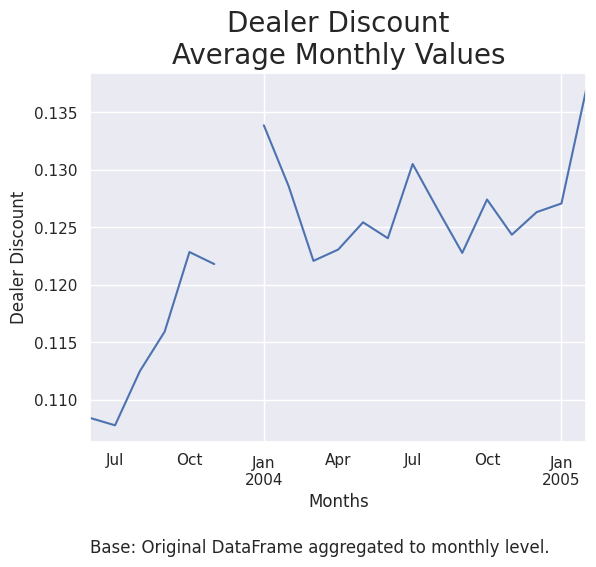

In [67]:
##
## Use Pandas' plot function.
## It automatically uses the DatetimeIndex for the X-axis.
##
base = 'Base: Original DataFrame aggregated to monthly level.'
ax = df_grp.plot( y = 'Ddisc', legend = False )
ax.set_title( 'Dealer Discount\nAverage Monthly Values', fontsize = font_title )
ax.set( ylabel = 'Dealer Discount', xlabel = 'Months' )
footer( ax );

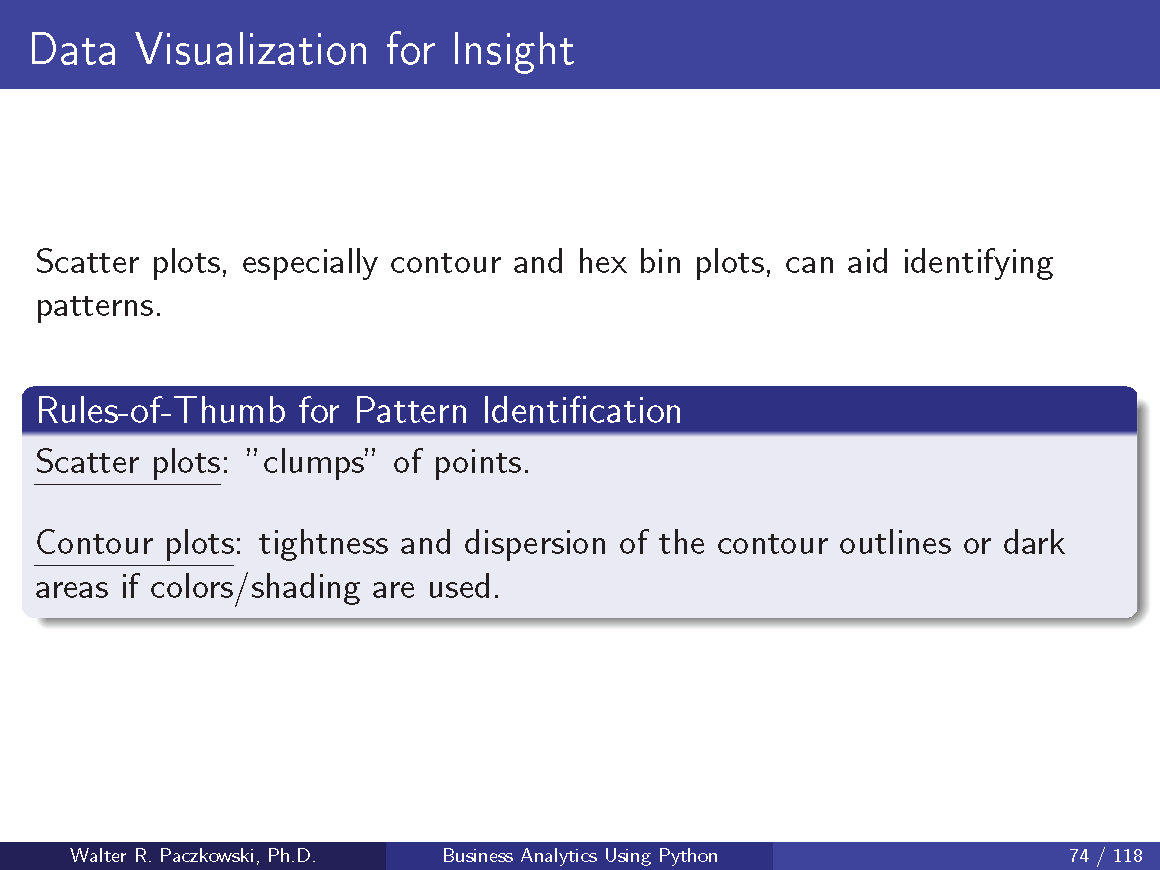

In [68]:
slide( '074' )

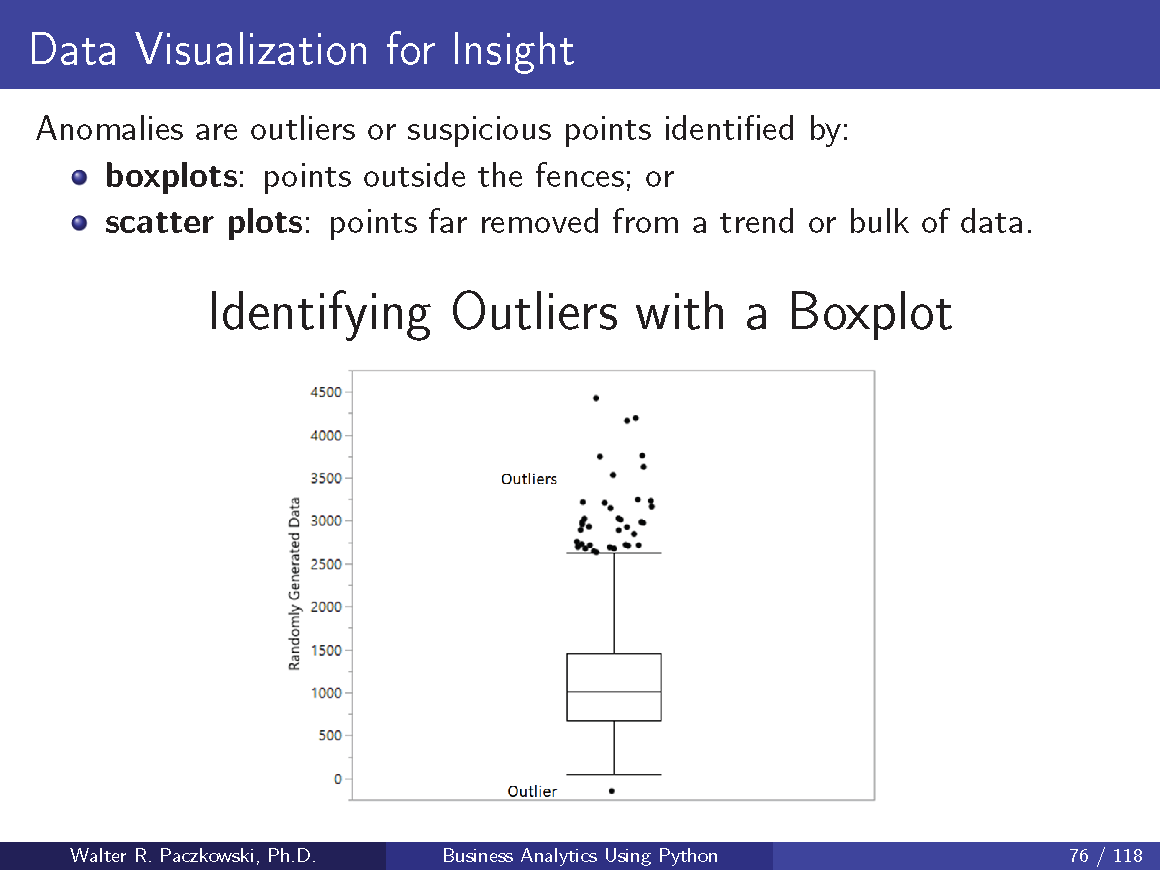

In [69]:
slide( '076' )

In [70]:
##
## Categorical plot: boxplot variant
##
base = 'Base: All data; n = ' + str( df.shape[ 0 ] )
ax = sns.catplot( 'Tdisc', kind = 'box', orient = 'v', data = df_orders )
plt.suptitle( 'Total Discount\nOutliers', fontsize = font_title, y = 1.07 )
ax.set( xlabel = '', ylabel = 'Total Discount' )
footer( plt );

TypeError: ignored